In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [5]:
y_train = df_train[['Survived']]

In [6]:
y_train

Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]

In [7]:
for col in df_train.keys():
    print(df_train.isna()[col].value_counts())
# True = nb nan value

False    891
Name: PassengerId, dtype: int64
False    891
Name: Survived, dtype: int64
False    891
Name: Pclass, dtype: int64
False    891
Name: Name, dtype: int64
False    891
Name: Sex, dtype: int64
False    714
True     177
Name: Age, dtype: int64
False    891
Name: SibSp, dtype: int64
False    891
Name: Parch, dtype: int64
False    891
Name: Ticket, dtype: int64
False    891
Name: Fare, dtype: int64
True     687
False    204
Name: Cabin, dtype: int64
False    889
True       2
Name: Embarked, dtype: int64


In [8]:
# On ne conserve que les cols pertinentes
x_train = df_train[['Sex', 'Pclass']] # On prendra l'age plus tard

In [9]:
x_train.head()

Sex  Pclass
0    male       3
1  female       1
2  female       3
3  female       1
4    male       3

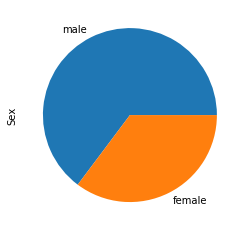

In [10]:
x_train['Sex'].value_counts().plot.pie()

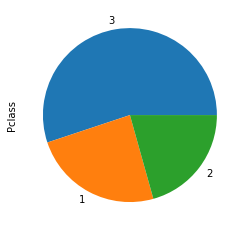

In [11]:
x_train['Pclass'].value_counts().plot.pie()

## Preprocessing

In [12]:
x_train['Is_female'] = (x_train['Sex'] == 'female').astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
x_train['Is_male'] = (x_train['Sex'] == 'male').astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
del x_train['Sex']
# x_train.drop({'Sex'}, 1, inplace=True)

In [15]:
x_train.head()

Pclass  Is_female  Is_male
0       3          0        1
1       1          1        0
2       3          1        0
3       1          1        0
4       3          0        1

# Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
model = LogisticRegression(random_state=0) # avoir le même modèle 2 fois d'affilé

In [18]:
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

# Evaluation et prédiction du modèle

In [19]:
y_train_pred = model.predict(x_train)

In [20]:
accuracy_score(y_train, y_train_pred)

0.7867564534231201

In [21]:
# y_test = x_test[['Survived']]

In [23]:
# Refaire tout le preprocessing sur le jeu de test 
# Attention, il ne faut pas faire le preprocessing sur toutes les données puis les séparer en entrainement et test
# 1 - Diviser le jeu, 2 - preprocessing il faut explorer aussi le jeu de test si ça correspond, 
# 3 - model, 4 - pred, 5 - preprocessing du test
# PS : faire des fonctions pour les étapes du preprocessing
# PS2 : on peut faire des pipelines d'étapes - voire plus tard 
x_test = df_test[['Sex', 'Pclass']]
x_test['Is_female'] = (x_test['Sex'] == 'female').astype('int')
x_test['Is_male'] = (x_test['Sex'] == 'male').astype('int')
del x_test['Sex']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [24]:
y_test_pred = model.predict(x_test)

In [25]:
y_test_pred = pd.DataFrame(y_test_pred)

In [26]:
y_test_pred['PassengerId'] = df_test['PassengerId']

In [27]:
y_test_pred.columns = ['Survived', 'PassengerId']

In [29]:
y_test_pred = y_test_pred.reindex(sorted(y_test_pred.columns), axis = 1)

In [30]:
y_test_pred

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [31]:
y_test_pred.to_csv('pred_it0.csv', index=False)